# Creating Customer Segments

### Unsupervised Learning

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

**Description of Categories**
- FRESH: annual spending (m.u.) on fresh products (Continuous)
- MILK: annual spending (m.u.) on milk products (Continuous)
- GROCERY: annual spending (m.u.) on grocery products (Continuous)
- FROZEN: annual spending (m.u.)on frozen products (Continuous) 
- DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous)
    - "A store selling cold cuts, cheeses, and a variety of salads, as well as a selection of unusual or foreign prepared foods."


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import renders as rs
%matplotlib inline
sns.set()

#### **Task 1: Import Dataset and create a copy of that dataset**

In [61]:
# Write code here

data = pd.read_csv("customers.csv")
df=data.copy()
df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicatessen  
0            1338  
1            1776  
2            7844  
3            1788  
4            5185  
..            ...  
435          2204  
436          2346  
437          1867  
438          2125  
439            52  

[440 rows x 8 columns]

**Task 2: Drop Region and Channel column**

In [62]:
# Write code here
df = df.drop(['Region', 'Channel'], axis=1)

**Task 3: Display first five rows** 

In [63]:
# Write code here
df.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

#### **Task 4: Display last five rows** 

In [64]:
# Write code here
df.tail()

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
435  29703  12051    16027   13135               182          2204
436  39228   1431      764    4510                93          2346
437  14531  15488    30243     437             14841          1867
438  10290   1981     2232    1038               168          2125
439   2787   1698     2510      65               477            52

#### **Task 5: Check the number of rows and columns**

In [65]:
# Write code here
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 440
Number of columns: 6


#### **Task 6: Check data types of all columns**

In [66]:
# Write code here
df.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

**Task 7: Check for missing values and fill missing values if required.**

In [67]:
# Write code here
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

## Data Exploration

#### **Task 8: Check summary statistics and store the resultant DataFrame in a new variable named *stats***

In [68]:
# Write code here
stats = df.describe()

# Display the summary statistics
stats

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

**Question: Explain the summary statistics for the above data set**

**Answer:** The mean is greater than the median, which indicates that the data set is positively skewed. This means that there are a few very large values in the data set that are pulling the mean up.
The standard deviation is very large, which indicates that the data points are spread out over a wide range of values.
There are a few outliers in the data set, which are data points that are far away from the rest of the data.

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

**Logic in selecting the 3 samples: Quartiles**
- As you can previously (in the object "stats"), we've the data showing the first and third quartiles.
- We can filter samples that are starkly different based on the quartiles.
    - This way we've two establishments that belong in the first and third quartiles respectively in, for example, the Frozen category.

**Task 9: Select any random sample and assign the list to given variable**

In [69]:
# Write code here

#random_sample = df.sample(1)
#random_sample
df.loc[[100, 200, 300],:]

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
100  11594   7779    12144    3252              8035          3029
200   3067  13240    23127    3941              9959           731
300  16448   6243     6360     824              2662          2005

In [70]:
df.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

These samples will be separated into another dataframe for finding out the details the type of customer each of the selected respresents

**Task 10: Make a dataframe of selected indices**

In [71]:
# Write code here
indices = [43, 12, 39]

# Create a DataFrame of the chosen samples
# .reset_index(drop = True) resets the index from 0, 1 and 2 instead of 100, 200 and 300 
samples = pd.DataFrame(df.loc[indices], columns = df.columns).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)


Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    630  11095    23998     787              9529            72
1  31714  12319    11757     287              3881          2931
2  56159    555      902   10002               212          2916

In [72]:
# Write code here
fresh_q1 = 3127.750000
display(df.loc[df.Fresh < fresh_q1, :].head())

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
16   1020   8816    12121     134              4508          1080
31   2612   4339     3133    2088               820           985
34   1502   1979     2262     425               483           395
35    688   5491    11091     833              4239           436
43    630  11095    23998     787              9529            72

In [73]:
frozen_q1 = 742.250000
display(df.loc[df.Frozen < frozen_q1, :].head())

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   12669   9656     7561     214              2674          1338
5    9413   8259     5126     666              1795          1451
6   12126   3199     6975     480              3140           545
8    5963   3648     6192     425              1716           750
12  31714  12319    11757     287              3881          2931

In [74]:
frozen_q3 = 3554.250000
display(df.loc[df.Frozen > frozen_q3, :].head(7))

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
3   13265   1196     4221    6404               507          1788
4   22615   5410     7198    3915              1777          5185
10   3366   5403    12974    4400              5977          1744
22  31276   1917     4469    9408              2381          4334
23  26373  36423    22019    5154              4337         16523
33  29729   4786     7326    6130               361          1083
39  56159    555      902   10002               212          2916

The selected sample values should be ranked amongst the whole of the data values to check their ranks and get a better understanding of spending of each sample/customer in each category

In [76]:
percentiles = df.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
percentiles

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
43    8.0  88.0     95.0    26.8              93.4           5.9
12   93.6  90.2     79.1    10.7              74.5          89.8
39   99.3   4.1      5.7    95.2              19.7          89.5

**Task 11: Draw a heatmap to show the above results achieved in** `percentile` **to have a better understanding.**

<Axes: >

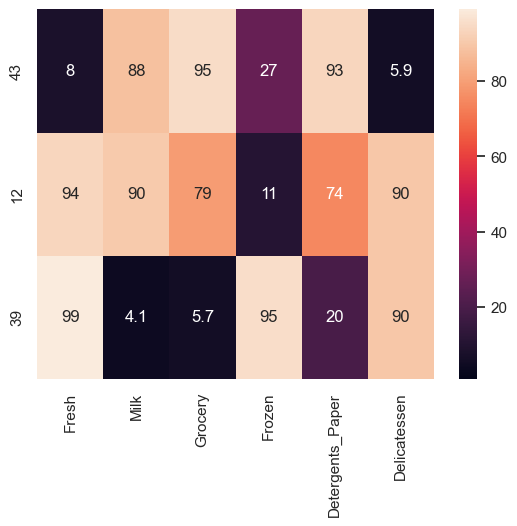

In [77]:
#Write code here
percentiles = df.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

#### Question: What type of customers can you identify by looking into the heatmap?

#### Answer: The heatmap shows the confusion matrix for a Random Forest classifier, which is a machine learning algorithm that is used for classification tasks. The confusion matrix shows how well the classifier was able to predict the actual class of the data points.

**Task 12: Find the corelation among all the variables of whole dataframe and describe the findings you infer from the heatmapt.**

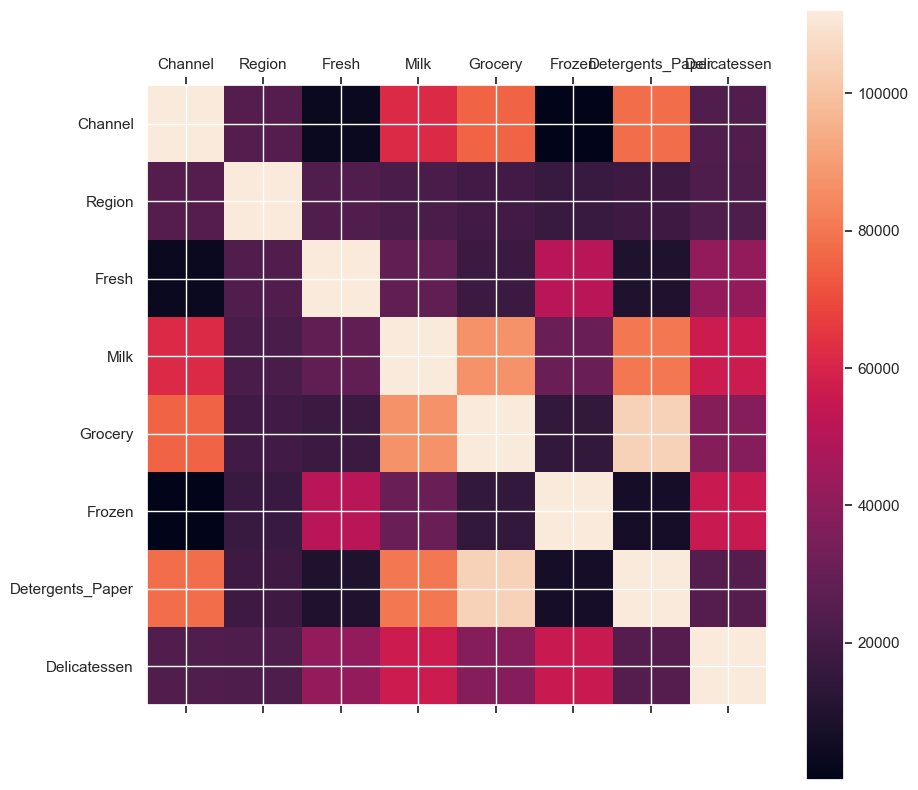

In [78]:
# Write the code here
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);


plot_corr(data)

**Answer:**

### Pair Plot

Pairplot is a plot which is used to give and over view of the data in a graphical grid form. The result it shows gives us a picture of variables themselves in a graphical way as well as a relationship of one variable with all the others. For more details you can [click here](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**Task 13: Make a pairplot using seaborn.**

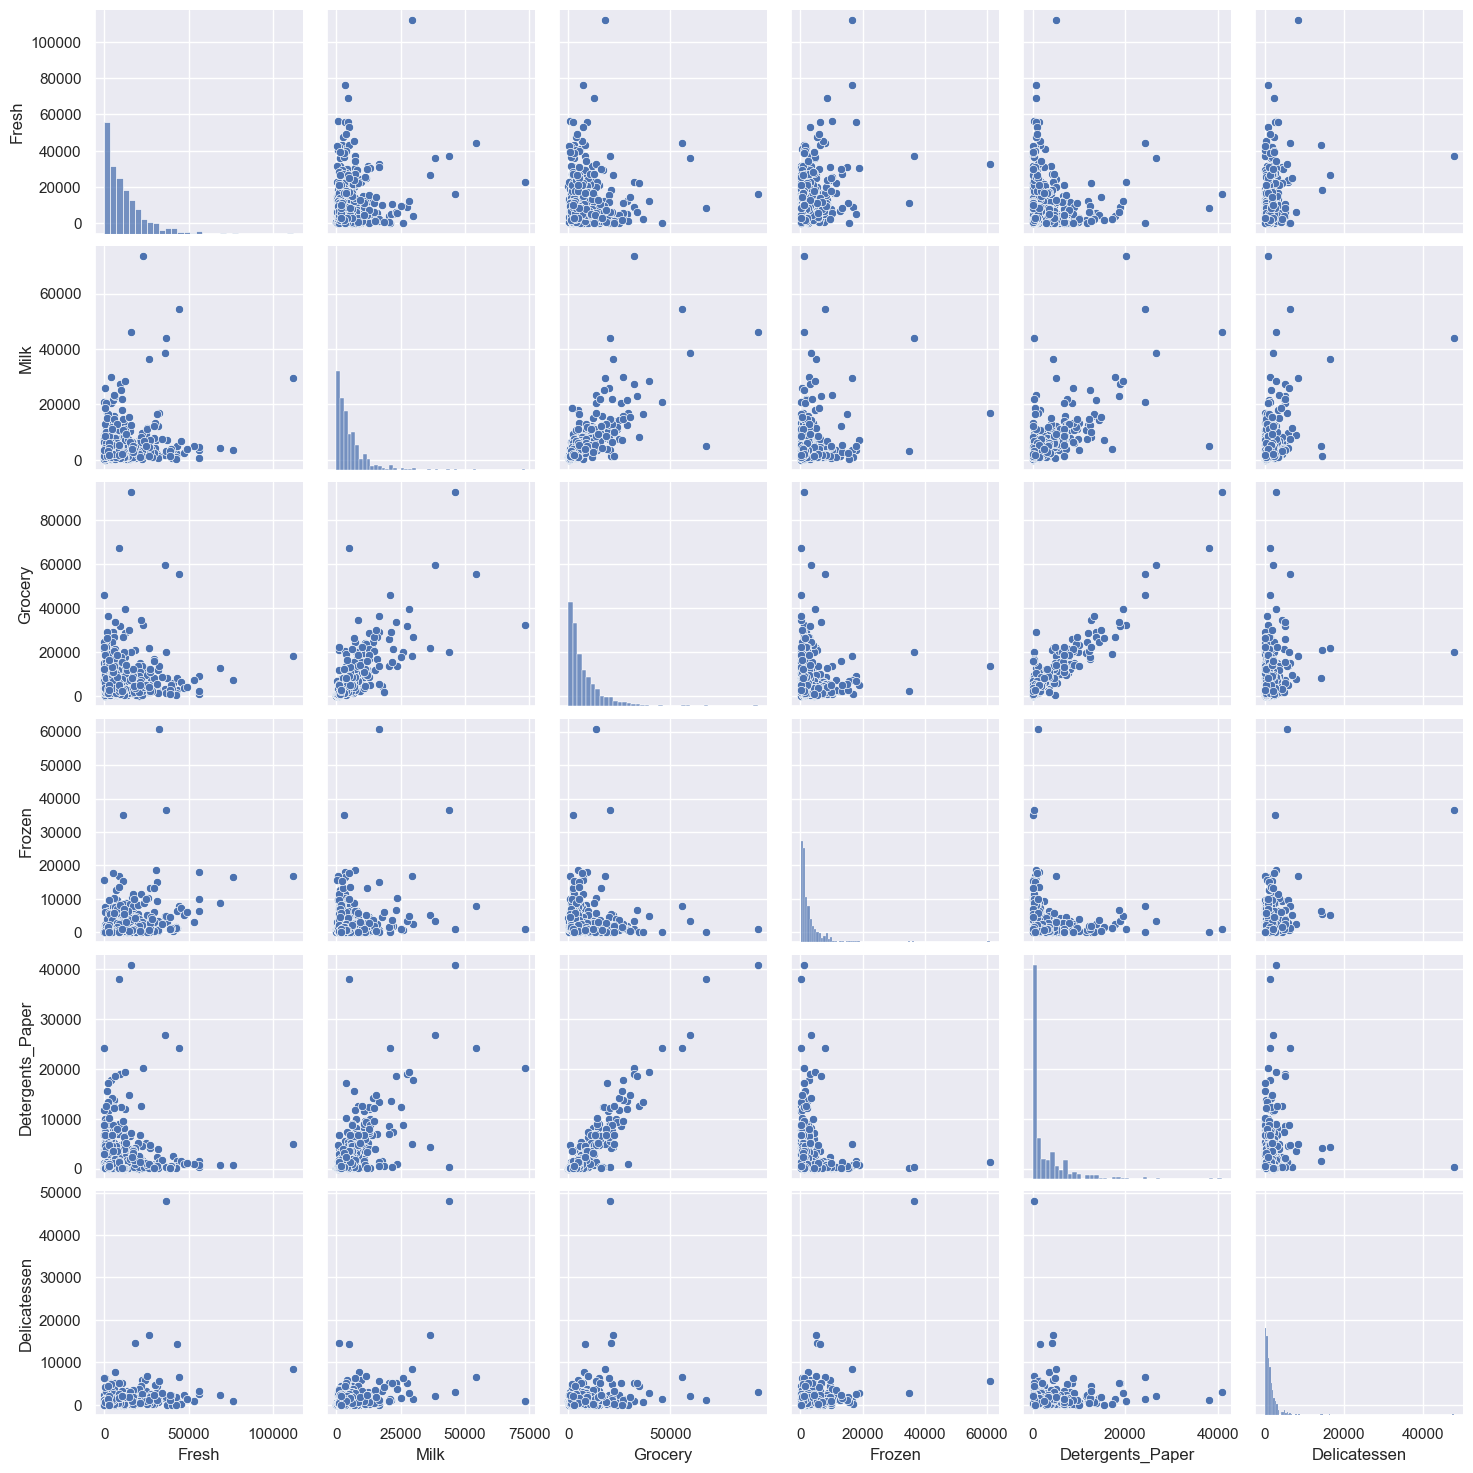

In [79]:
# write code here
sns.pairplot(df)
plt.show()

**Question: What findings do you get from the above plot? Describe in terms of skewned/normal form by looking at each variable and also look for any outliers that can be visually identified in the plot.**

**Answer:** every column that are skewed are skewed to right. i can also see that there are a few outliers in the distributions. Outliers are data points that are far away from the rest of the data. The outliers in these plots are the products with the very high price.

To describe the distributions in terms of skewness and outliers, I would say that they are right-skewed distributions with a few outliers.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by normalizing it by **removing skewness** and **detecting (and optionally removing) outliers**. 

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data.

**Task 14: Apply log on data for transforming it from skewed to normalized form. Use function** `np.log()` **and save the result in** `log_data`

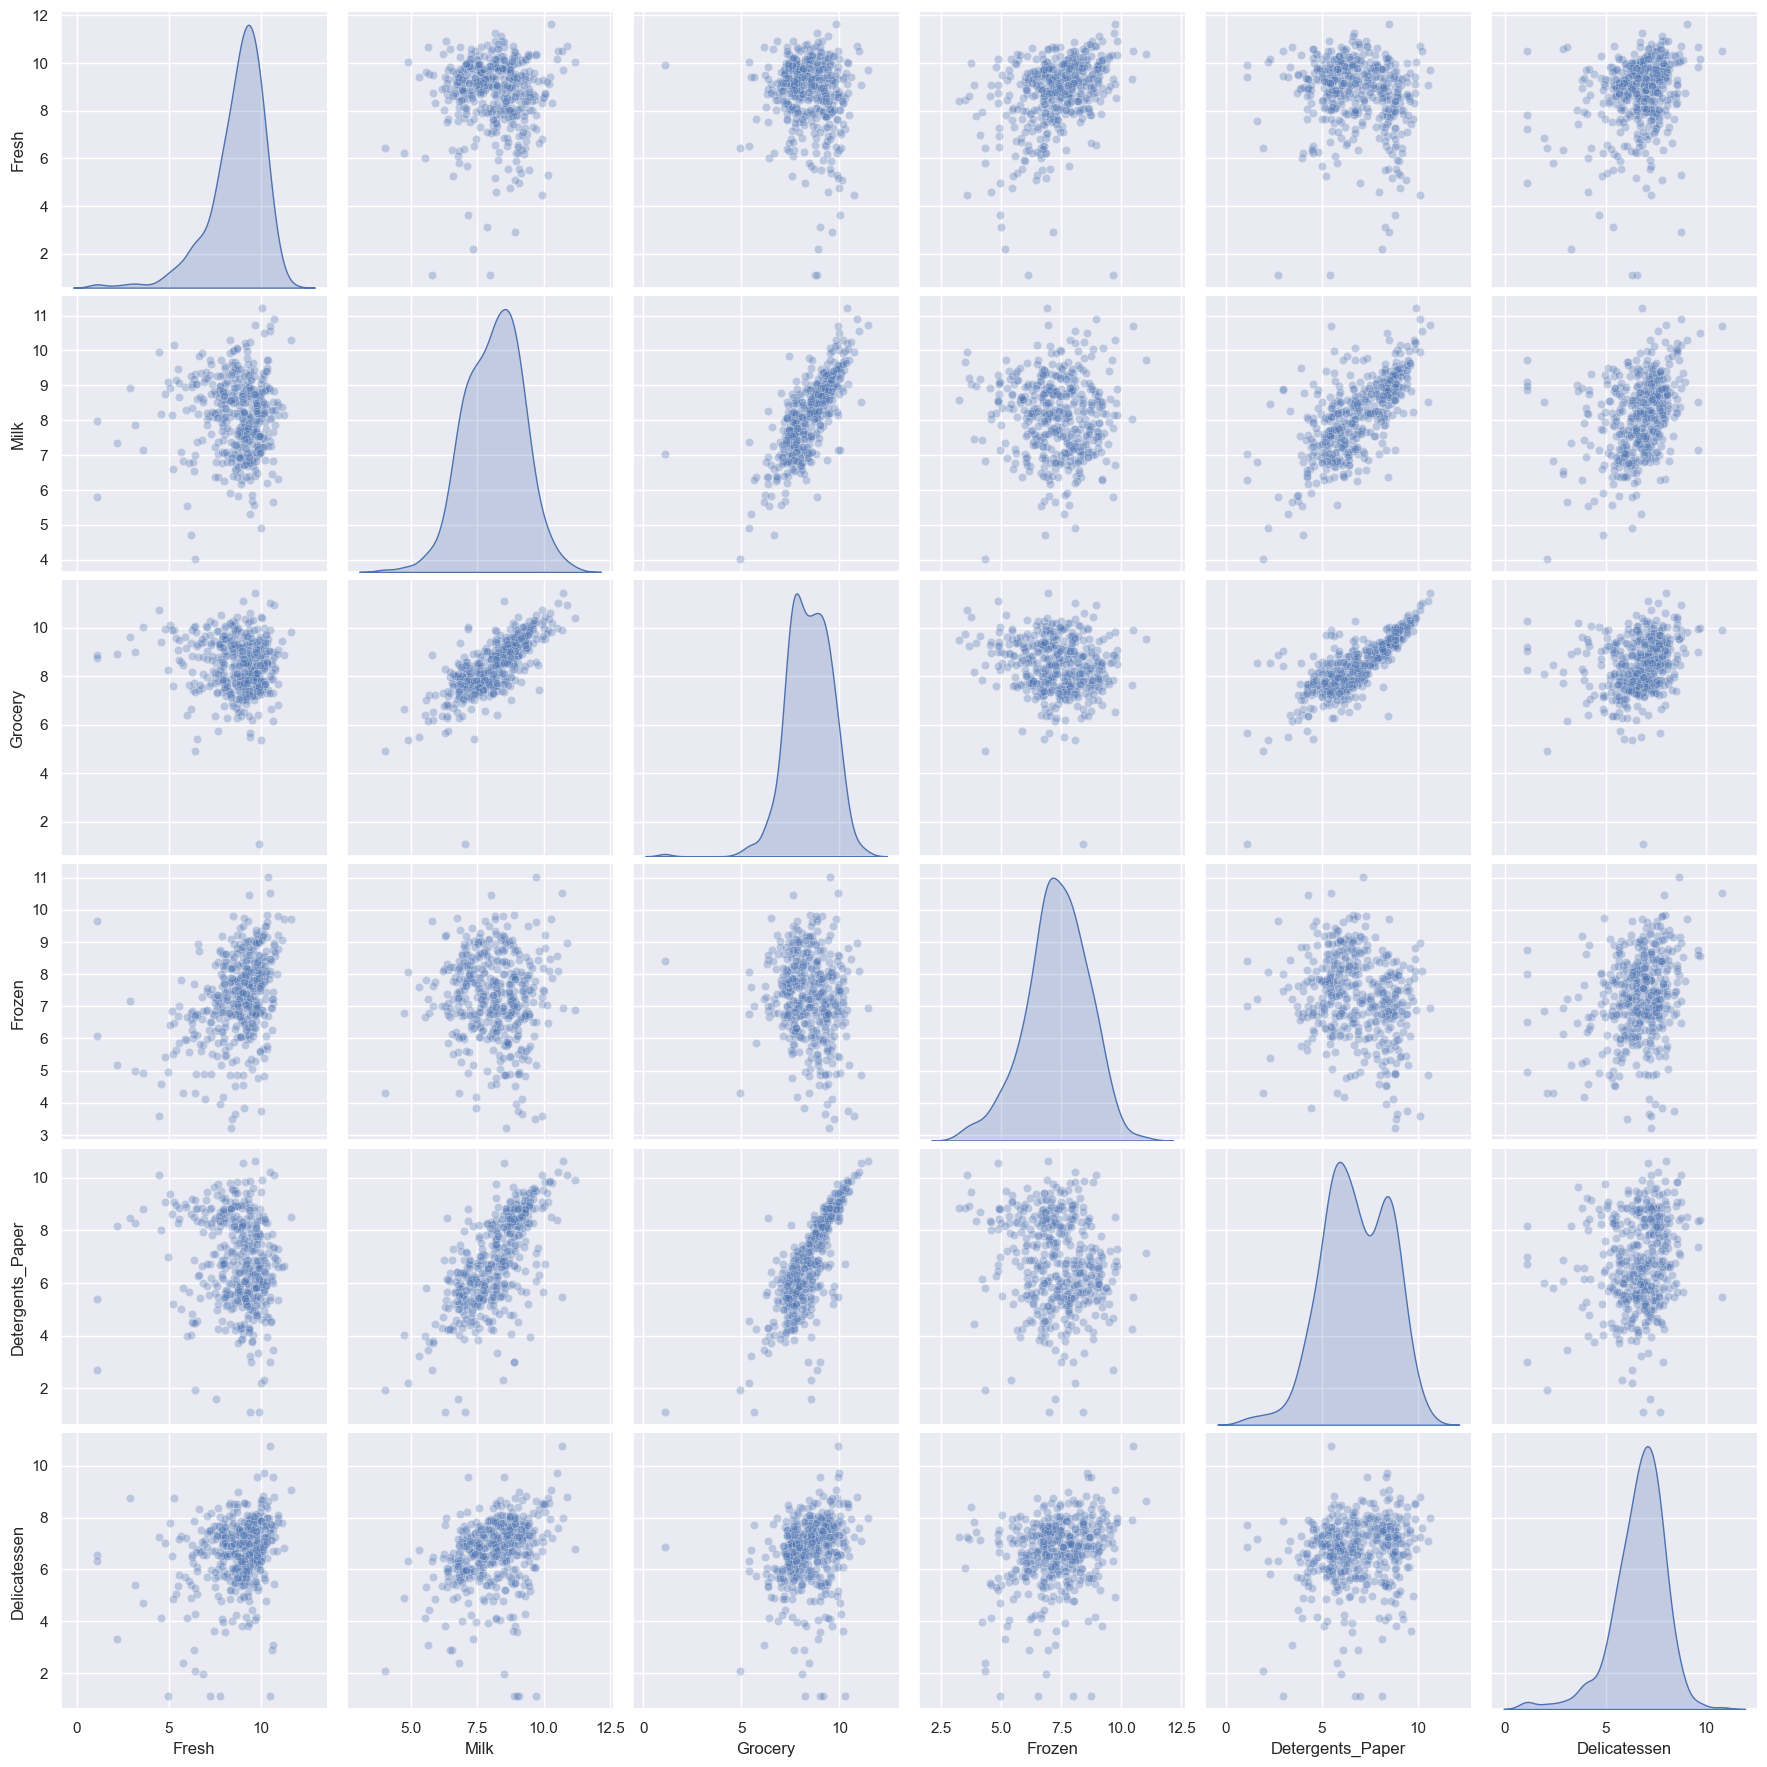

In [80]:
#Write code here
log_data = np.log(df)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
sns.pairplot(log_data, diag_kind='kde', plot_kws={'alpha':0.3}, height=3)
plt.show()

In [81]:
display(log_samples)

Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0   6.445720  9.314250  10.085726  6.668228          9.162095      4.276666
1  10.364514  9.418898   9.372204  5.659482          8.263848      7.983099
2  10.935942  6.318968   6.804615  9.210540          5.356586      7.977968

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to Q1. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to Q3. Again, use `np.percentile`.
 - Assign the calculation of an IQR for the given feature.
 - Query the data to filter out Outliers using IQR
 - remove data points from the dataset by adding indices to the outliers list

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points! 

Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [82]:
np.percentile(df.loc[:, 'Milk'], 25)

1533.0

In [83]:
import numpy as np
import itertools

# Create an empty list to store outliers
outliers_lst = []

# For each feature, find data points with extreme high or low values
for feature in log_data.columns:
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    
    # Find and display the outliers for the current feature
    outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outliers_rows)
    
    # Append the indices of the outliers to the outliers_lst
    outliers_lst.extend(outliers_rows.index)

# List of unique outliers
uniq_outliers = list(set(outliers_lst))

# List of duplicate outliers
dup_outliers = list(set([x for x in outliers_lst if outliers_lst.count(x) > 1]))

print('Outliers list:\n', uniq_outliers)
print('Length of outliers list:\n', len(uniq_outliers))

print('Duplicate list:\n', dup_outliers)
print('Length of duplicates list:\n', len(dup_outliers))

# Remove duplicate outliers
# Only 5 specified
good_data = log_data.drop(log_data.index[dup_outliers]).reset_index(drop=True)

# Original Data 
print('Original shape of data:\n', log_data.shape)
# Processed Data
print('New shape of data:\n', good_data.shape)


Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

Outliers list:
 [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]
Length of outliers list:
 42
Duplicate list:
 [128, 65, 66, 75, 154]
Length of duplicates list:
 5
Original shape of data:
 (440, 6)
New shape of data:
 (435, 6)


**Question**<br>
Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why?

**Answer:**
    Specifically there are 5 examples that have duplicates.
Their indices are in this array: [128, 65, 66, 75, 154]. They should be removed as they are not only outliers in one categories but more than once.
Hence, they are not representative of our general customers. If it is obvious that the outlier is due to incorrectly entered or measured data, you should drop the outlier
If the outlier does not change the results but does affect assumptions, you may drop the outlier. But note that in a footnote of your paper.

**Task 15: Make a pairplot to check changes in data after pre-processing and using the** `good_data`

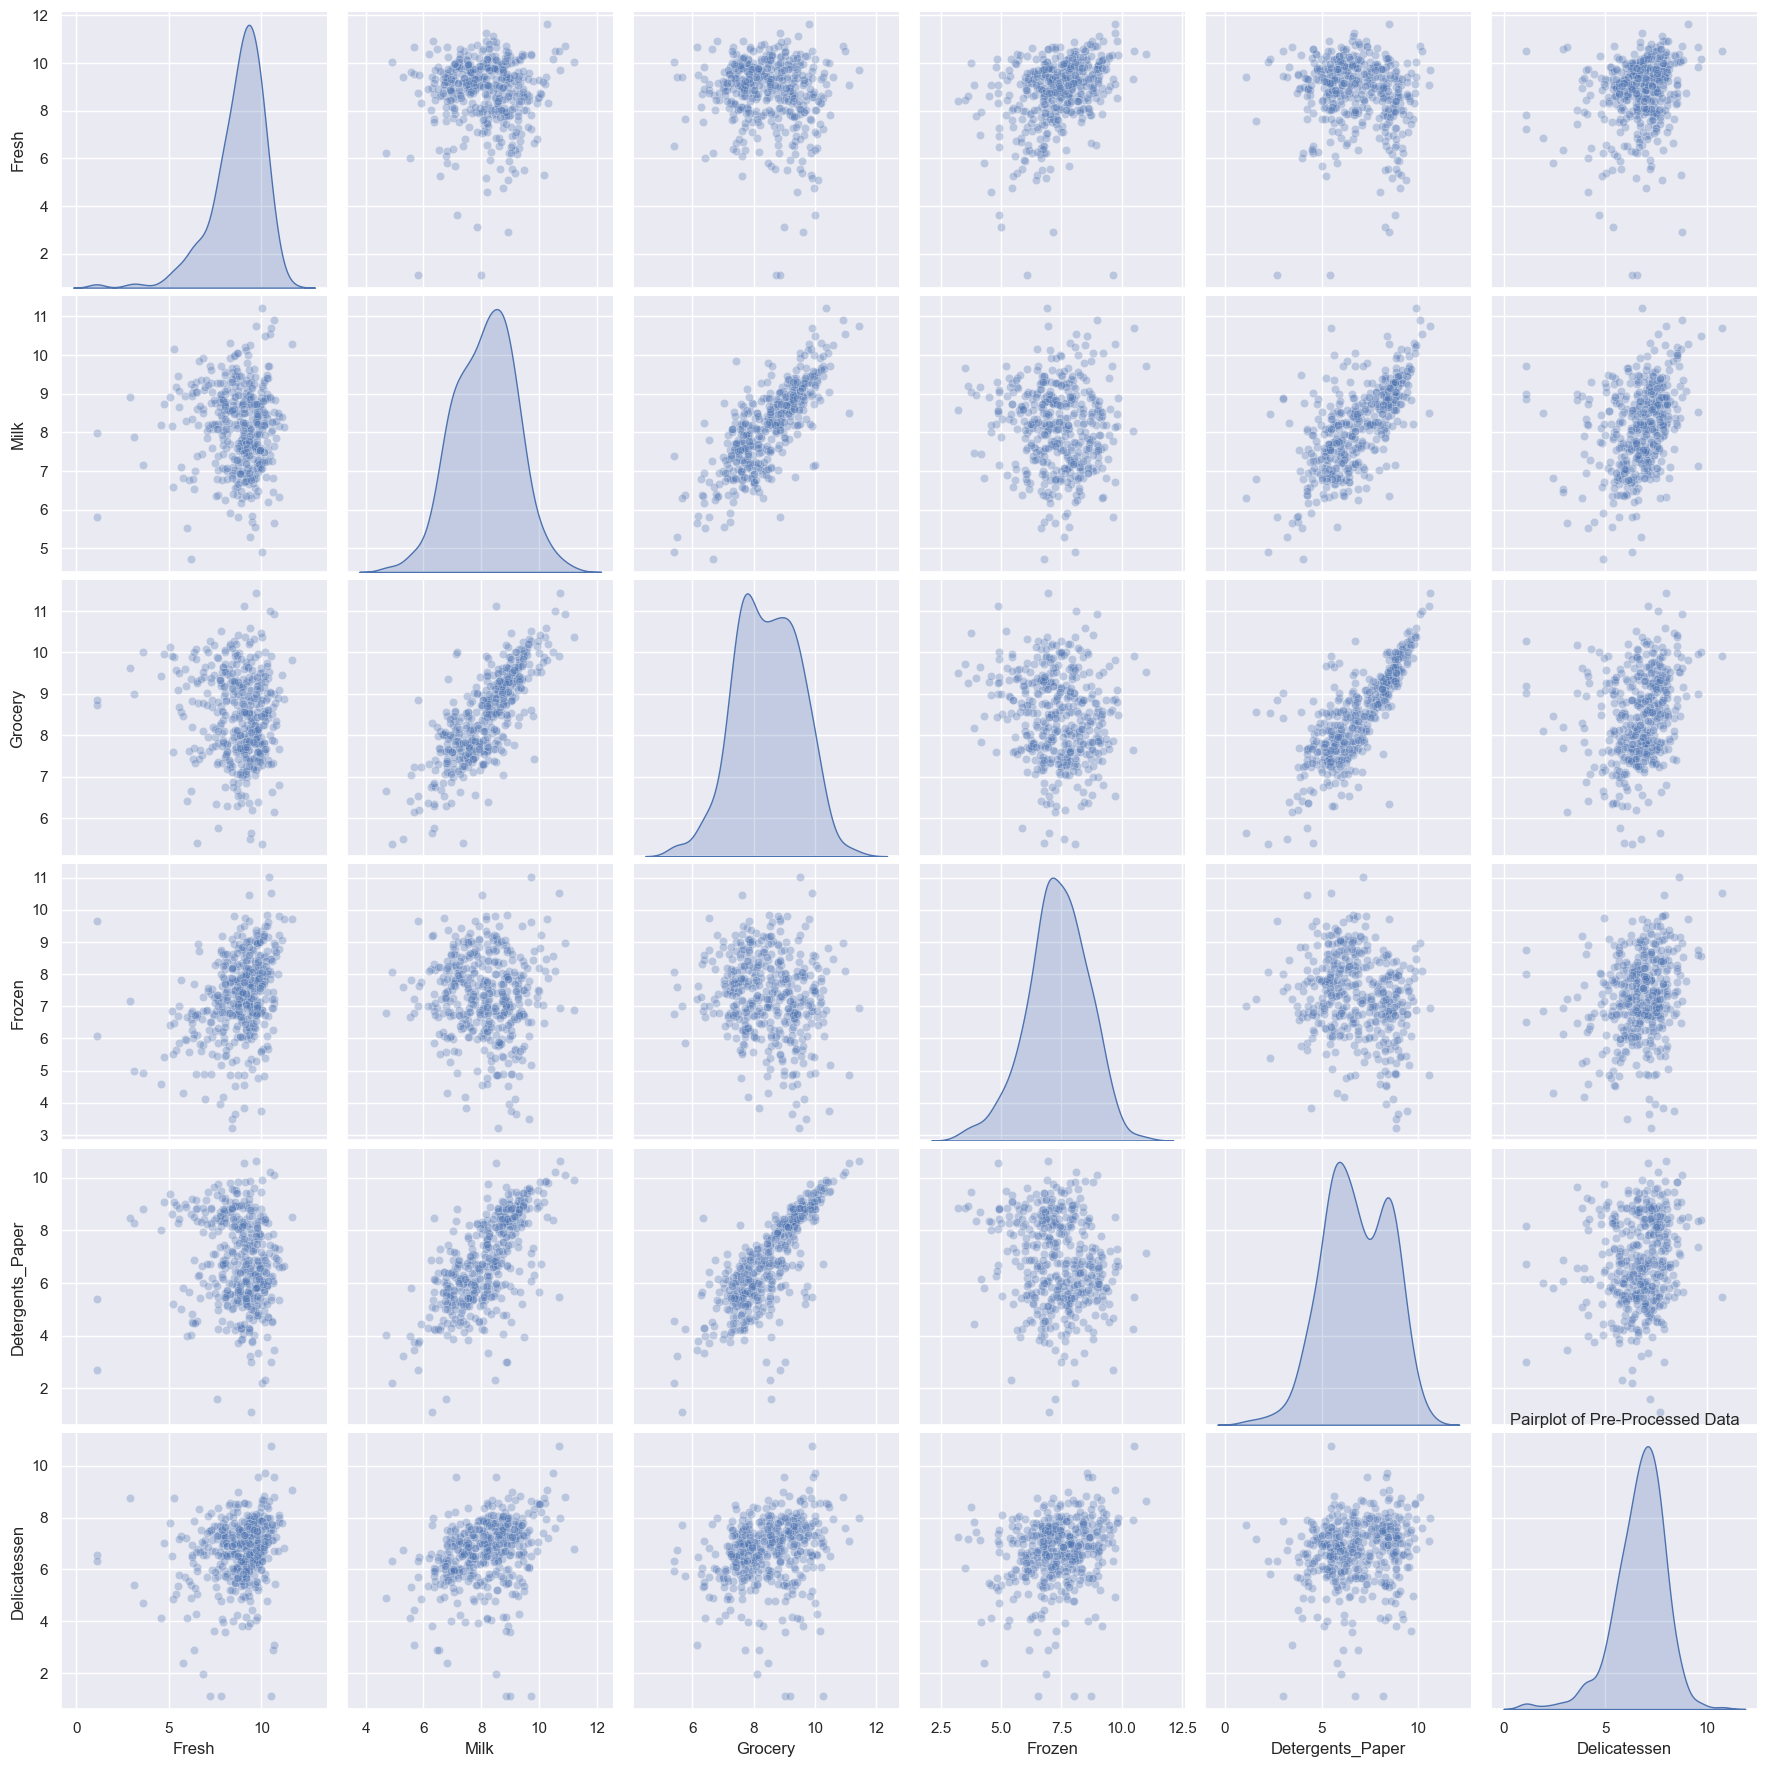

In [84]:
# Write the code here
sns.pairplot(good_data, diag_kind='kde', plot_kws={'alpha': 0.3}, height=3)
plt.title("Pairplot of Pre-Processed Data")
plt.show()

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and 
 - Apply a PCA transformation of the good data.

**Task 16: Import PCA Library**

In [85]:
# Write your code here
from sklearn.decomposition import PCA

**Task 17: Apply PCA by fitting the good data with the same number of dimensions as features.**

In [86]:
# Write your code here
pca = PCA(n_components=6)
# Fit
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [87]:
# Write your code here


In [88]:
# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)
pca_results

Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4430  0.1675 -0.4014  -0.4381  0.1782   
Dimension 2              0.2638 -0.6859 -0.1672  -0.0707 -0.5005   
Dimension 3              0.1231 -0.6774  0.0402  -0.0195  0.3150   
Dimension 4              0.1012 -0.2043  0.0128   0.0557  0.7854   
Dimension 5              0.0485 -0.0026  0.7192   0.3554 -0.0331   
Dimension 6              0.0204  0.0292 -0.5402   0.8205  0.0205   

             Detergents_Paper  Delicatessen  
Dimension 1           -0.7514       -0.1499  
Dimension 2           -0.0424       -0.4941  
Dimension 3           -0.2117        0.6286  
Dimension 4            0.2096       -0.5423  
Dimension 5           -0.5582       -0.2092  
Dimension 6           -0.1824        0.0197

**Task 18: Find cumulative explained variance**

In [89]:
# Write the code here
#cumsum_pca_results= None
# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

**Question**
How much variance in the data is explained ***in total*** by the first and second principal component? What about the first four principal components? How many components should be selected for reducing the dimensions? Give your answer along with the reason.

**Answer:**
70.68% of the variance in the data is explained by the first and second principal components.
93.11% of the variance in the data is explained by the first four principal components.
Components breakdown:
The first principal component (PC1):
An increase in PC1 is associated with large increases in "Milk", "Grocery" and "Detergents_Paper" spending.
These features best represent PC1.
This is in line with our initial findings where the 3 features are highly correlated.
The second principal component (PC2):
An increase in PC2 is associated with large increases in "Fresh", "Frozen" and "Delicatessen" spending.
These features best represent PC2.
This makes sense as PC1 represents different features. And in PC2, the features in PC1 have very small positive weights.
The third principal component (PC3):
An increase in PC3 is associated with a large increase in "Delicatessen" and a large decrease in "Fresh" spending.
These features best represent PC3.
The fourth principal component (PC4):
An increase in PC4 is associated with a large increasing in "Frozen" and a large decrease in "Delicatessen" spending.
These features best represent PC4.

### Implementation: Dimensionality Reduction
In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

**Task 19: Apply PCA by fitting the good data with the selected number of components**

In [90]:
# write your code here
pca = PCA(n_components=2)
pca.fit(good_data)

PCA(n_components=2)

**Task 20: Transform the good data using the PCA fit above**

In [91]:
# write your code here

reduced_data = pca.transform(good_data)

**Task 21: Create a DataFrame for the reduced data**

In [92]:
# write your code here
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [93]:
pca_samples = pca.transform(log_samples)

In [94]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -3.1072       2.7017
1      -2.2406      -1.2419
2       3.0426      -2.5854

## Implementation: Creating Clusters

In this section, you will choose to use either a K-Means clustering algorithm  and hierarchical clustering to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

## Choosing K

**Before Implementing KMeans and hierarchical clustering, choose the optimal K using the following method**

- Silhouette Score
- Elbow Method

### Silhouette Score for K-Means

In [95]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Task 22-a: Check Silhouette Score for finding Optimal K**

In [96]:
# Import necessary libraries
silhouette_scores = []

# Iterate through a range of K values (e.g., from 2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(good_data)
    labels = kmeans.predict(good_data)
    silhouette_avg = silhouette_score(good_data, labels)
    silhouette_scores.append(silhouette_avg)


C:\Users\opi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\opi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\opi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\opi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

In [38]:
# write your code here


**Task 23-a: Plot a graph representing the Silhouette Score.**

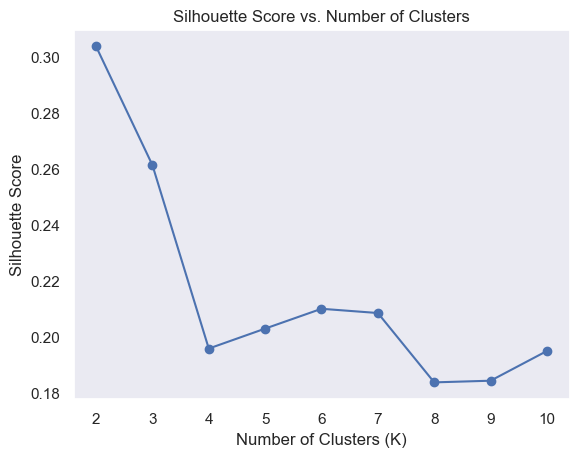

In [97]:
#add plot
# Plot Silhouette Scores for different K values
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()
plt.show()

**Task 22-b: Apply Elbow Method for finding Optimal K**

In [98]:
# Import necessary libraries
from sklearn.cluster import KMeans

In [99]:
# write your code here
wcss = []

# Iterate through a range of K values (e.g., from 2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(good_data)
    wcss.append(kmeans.inertia_)

C:\Users\opi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\opi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\opi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\opi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

**Task 23-b: Plot a graph representing the Elbow Method.**

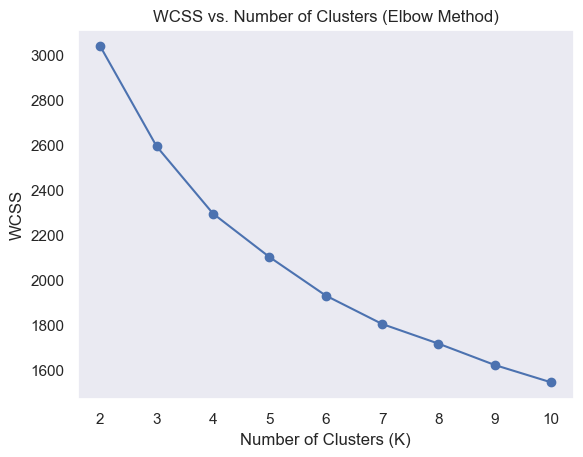

In [100]:
#add plot
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('WCSS vs. Number of Clusters (Elbow Method)')
plt.grid()
plt.show()






## Implementation of K-Means

**Task 24: Implement KMeans using your choosen K**

In [101]:
# write your code here
from sklearn.cluster import KMeans

# Define the chosen number of clusters (K)
chosen_k = 4  # Replace with your chosen K

# Create a K-Means instance with the chosen number of clusters
kmeans = KMeans(n_clusters=chosen_k, random_state=42)

# Fit the K-Means model to the preprocessed data (good_data)
kmeans.fit(good_data)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Assign the cluster labels to the original DataFrame (good_data)
good_data['Cluster'] = cluster_labels


C:\Users\opi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\opi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [102]:
# write your code here
#preds = None
# Create a copy of the DataFrame without the 'Cluster' column for prediction
data_for_prediction = good_data.drop('Cluster', axis=1)

# Make predictions on the data_for_prediction using the trained K-Means model
preds = kmeans.predict(data_for_prediction)

# Assign the cluster labels (predictions) to the 'Cluster' column of the DataFrame
good_data['Cluster'] = preds


In [103]:
preds

array([2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 0, 1, 2, 2, 2, 3,
       1, 2, 2, 0, 3, 3, 2, 1, 2, 1, 3, 1, 3, 0, 1, 2, 0, 1, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 3, 2, 0, 2, 2, 2, 1, 2,
       1, 3, 1, 2, 1, 1, 2, 1, 2, 3, 0, 3, 0, 2, 1, 2, 2, 2, 1, 3, 1, 3,
       1, 2, 1, 0, 0, 0, 3, 3, 3, 2, 2, 2, 1, 1, 3, 0, 2, 0, 0, 3, 2, 1,
       1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 2, 1, 1, 1, 2, 1, 1, 3, 3, 3, 3, 3,
       2, 0, 3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2,
       0, 2, 3, 1, 2, 2, 2, 2, 0, 3, 3, 0, 0, 0, 0, 3, 0, 1, 3, 3, 1, 2,
       2, 0, 1, 0, 3, 3, 0, 2, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 1,
       0, 3, 0, 3, 0, 0, 2, 1, 2, 3, 2, 2, 2, 0, 3, 0, 3, 3, 0, 3, 1, 3,
       3, 2, 3, 0, 1, 1, 0, 3, 0, 1, 0, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 3,
       3, 3, 1, 3, 2, 1, 2, 2, 3, 3, 1, 1, 1, 3, 3, 3, 1, 0, 1, 2, 1, 2,
       3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 2, 3, 2, 1, 1, 1, 3, 3, 1, 3, 3, 3,
       3, 1, 2, 1, 0, 1, 2, 2, 3, 2, 2, 0, 0, 0, 0,

## Implementation Hierarchical Clustering

**Task 25: Implement Hierarchical(agglomerative) clustering using your choosen K**

In [104]:
# write your code here
#a_cluster = None
from sklearn.cluster import AgglomerativeClustering

# Define the chosen number of clusters (K)
chosen_k = 4  # Replace with your chosen K

# Create an AgglomerativeClustering instance with the chosen number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=chosen_k)

# Fit the AgglomerativeClustering model to the preprocessed data (good_data)
agg_clustering.fit(good_data)

# Get cluster labels for each data point
cluster_labels = agg_clustering.labels_

# Assign the cluster labels to the original DataFrame (good_data)
good_data['Cluster'] = cluster_labels


In [105]:
# write your code here
#preds_agg = None
from sklearn.cluster import AgglomerativeClustering

# Define the chosen number of clusters (K)
chosen_k = 4  # Replace with your chosen K

# Create an AgglomerativeClustering instance with the chosen number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=chosen_k)

# Fit the AgglomerativeClustering model and obtain cluster labels
preds_agg = agg_clustering.fit_predict(good_data)

# Assign the cluster labels to the original DataFrame (good_data)
good_data['Cluster'] = preds_agg


In [106]:
preds_agg

array([3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 1, 2, 3, 3, 3, 0,
       2, 2, 3, 1, 0, 0, 3, 2, 3, 2, 0, 2, 0, 1, 2, 3, 1, 2, 2, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 2, 1, 3, 1, 2, 3, 3, 1, 0, 3, 1, 3, 3, 3, 2, 3,
       2, 0, 2, 2, 2, 2, 3, 2, 3, 0, 2, 0, 1, 3, 2, 2, 3, 3, 2, 0, 2, 0,
       2, 3, 2, 1, 0, 1, 0, 0, 0, 3, 3, 3, 2, 2, 0, 1, 3, 1, 1, 0, 3, 2,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 3, 2, 2, 0, 0, 0, 0, 0,
       3, 1, 0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 2, 3,
       1, 3, 0, 2, 3, 2, 3, 3, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 3,
       2, 1, 2, 1, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0, 2, 2, 3, 2, 0, 3, 3, 2,
       1, 0, 1, 0, 2, 1, 3, 2, 3, 0, 3, 3, 3, 1, 0, 1, 0, 0, 1, 0, 2, 0,
       0, 3, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3, 0,
       0, 0, 2, 0, 3, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 3, 2, 3,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 3, 0, 3, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 3, 2, 1, 2, 2, 3, 0, 3, 3, 1, 1, 1, 1,

## Best Clustering Algorithm?

**You will be using** `adjusted rand index` **to select the best clustering algorithm by comparing each of the calculated labels with actual labels found in** `data['Channel]` . Before calculating the score, we need to make sure that the shape of true labels is consistent with the resultant labels.

**Task 26: Find the adjusted rand index for K-Means and Agglomerative Clustering**

In [ ]:
# Make a copy of the 'Channel' column before preprocessing
#true_labels = df['Channel'].copy()

# Drop duplicate outliers from the 'true_labels' column
#true_labels = true_labels.drop(true_labels.index[dup_outliers]).reset_index(drop=True)


In [109]:
true_labels = data['Channel'].drop(data['Channel'].index[dup_outliers]).reset_index(drop = True)




In [111]:
# Import necessary libraries
from sklearn.metrics import adjusted_rand_score

In [113]:
kmeans_score = adjusted_rand_score(true_labels, preds)
print ('The score for Kmeans is ',kmeans_score)


The score for Kmeans is  0.2837471930789081


In [118]:
aggl_score = adjusted_rand_score(true_labels, preds_agg)
print ('The score for Agglomerative Clustering is ', aggl_score)

The score for Agglomerative Clustering is  0.2818546857508647


**Question: Which has the best score and should be selected?**

**Answer:** both have low score so both models are under fit.

## Visualizing the clusters

**Task 27: Get the centers for KMeans**

In [120]:
# Write code here
#centers = None
centers = kmeans.cluster_centers_

# Print the cluster centers
print('Cluster Centers for K-Means:')
print(centers)

Cluster Centers for K-Means:
[[6.90023863 8.6122977  9.17322538 5.89685945 8.20955642 5.66767505]
 [9.60578604 7.99803295 8.19215655 8.57873072 6.27677948 7.20884912]
 [9.04700177 9.02329034 9.44935418 7.18906542 8.50074868 7.36534643]
 [8.72743599 7.28574854 7.54447647 7.11126053 5.18835824 6.21244135]]


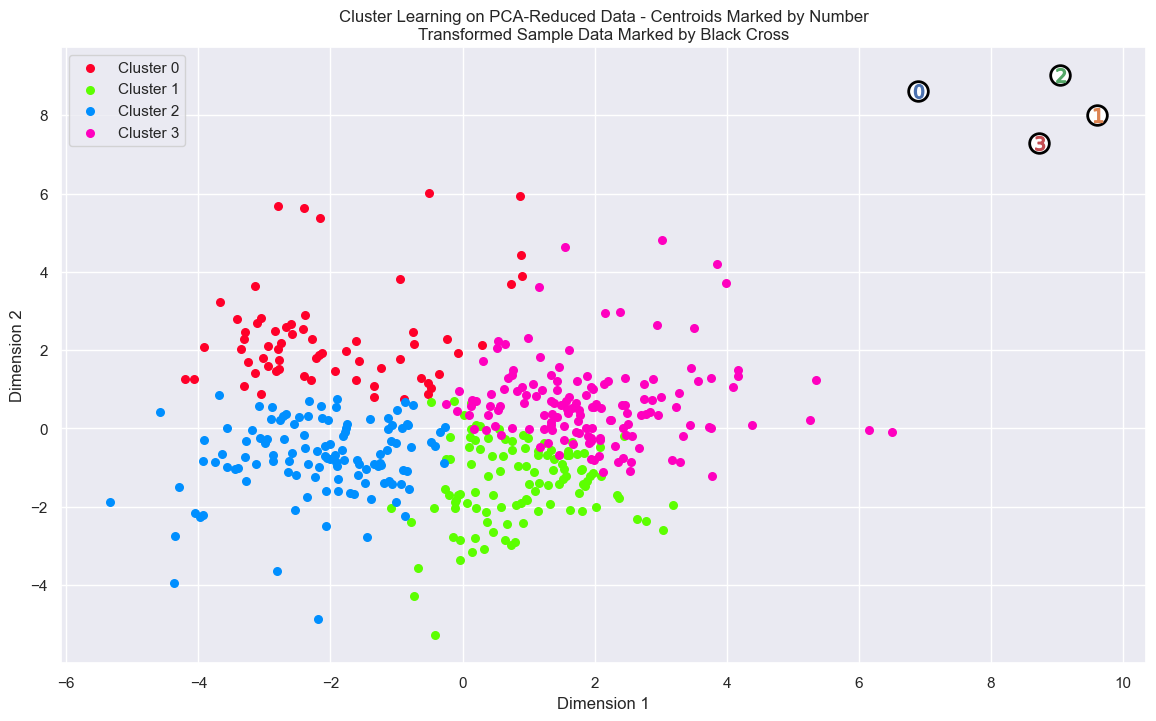

In [121]:
rs.cluster_results(reduced_data, preds, centers)

# Profiling

In [132]:
df_pred = df.drop(df.index[dup_outliers]).reset_index(drop = True)
df_pred['pred'] = preds

**Task 28: Get the average prices for each category from the original data frame for each cluster and then make a profile for each**

In [136]:

# write the code here
clustered_avg = df_pred.groupby('pred').mean()

# Display the profile for each cluster
print("Clustered Average Prices:")
print(clustered_avg)

Clustered Average Prices:
             Fresh          Milk       Grocery       Frozen  Detergents_Paper  \
pred                                                                            
0      2317.843750   7064.968750  11898.203125   653.109375       5175.781250   
1     20474.754545   4312.018182   4511.418182  7364.572727        693.063636   
2     12097.923077  10974.854701  15734.837607  1926.974359       6758.393162   
3     10019.826389   2133.937500   2379.423611  1871.229167        283.798611   

      Delicatessen  
pred                
0       749.937500  
1      2276.972727  
2      2230.615385  
3       757.375000  


**Task 29: Make a radar chart to show a better profile for each cluster.**

In [144]:
# Write the code to import the library files for plotly and set your credentials
import matplotlib.pyplot as plt
import numpy as np

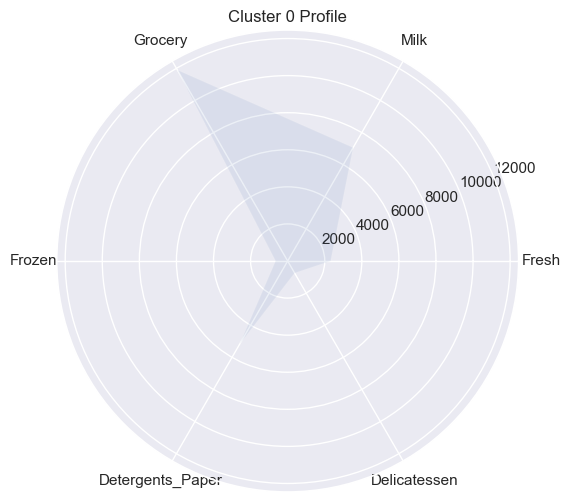

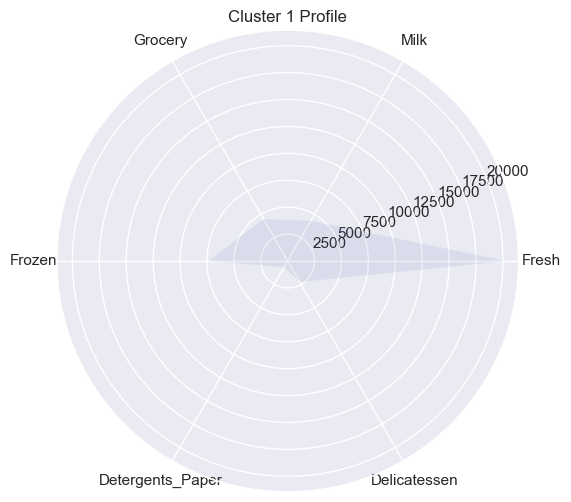

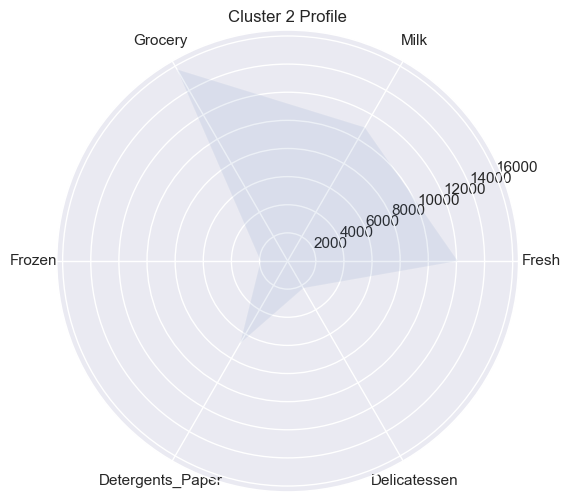

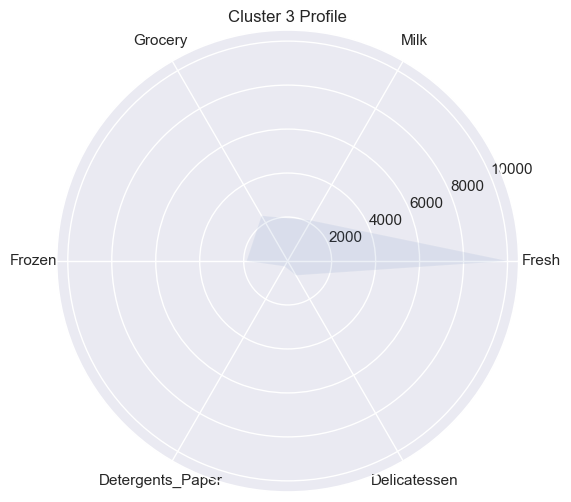

In [146]:

# Define the number of clusters
chosen_k = 4

# Define the product categories
categories = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

# Create a function to plot a radar chart for a single cluster
def plot_radar_chart(cluster_label):
    # Get the average spending for the specified cluster
    cluster_data = clustered_avg.loc[cluster_label].values.tolist()
    cluster_data += cluster_data[:1]  # Repeat the first value to create a 'closed loop'

    # Calculate the angle values for the radar chart
    num_categories = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
    angles += angles[:1]

    # Plot the radar chart
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, cluster_data, 'b', alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(f'Cluster {cluster_label} Profile')

# Create radar charts for each cluster
for label in range(chosen_k):
    plot_radar_chart(label)

# Show the radar charts
plt.show()

  

**Task 30: Make the data set for radar chart**

In [147]:
# Write your code here
#radar_data = None
selected_clusters = [0, 1, 2]  # Replace with the cluster labels you want to include

# Create a DataFrame for the selected clusters
selected_data = clustered_avg.loc[selected_clusters]

# Transpose the DataFrame to have categories as columns and clusters as rows
selected_data = selected_data.transpose()

# Reset the index to have categories as a column
selected_data.reset_index(inplace=True)

# Rename the columns for clarity
selected_data.columns = ['Category'] + [f'Cluster {label}' for label in selected_clusters]

# Display the selected data for the radar chart
print(selected_data)




           Category     Cluster 0     Cluster 1     Cluster 2
0             Fresh   2317.843750  20474.754545  12097.923077
1              Milk   7064.968750   4312.018182  10974.854701
2           Grocery  11898.203125   4511.418182  15734.837607
3            Frozen    653.109375   7364.572727   1926.974359
4  Detergents_Paper   5175.781250    693.063636   6758.393162
5      Delicatessen    749.937500   2276.972727   2230.615385


**Task 31: Set the layout for your radar chart and plot it**

In [149]:
# Write your code here
import plotly.express as px

# Define the selected_data DataFrame as described in Task 30
# ...

# Extract the category names and cluster values
category_names = selected_data['Category'].tolist()
cluster_values = selected_data.iloc[:, 1:].values.tolist()

# Create a radar chart layout
radar_layout = {
    'polar': {
        'radialaxis': {
            'showgrid': True,
            'ticksuffix': '%',
        },
    },
    'showlegend': True,
    'legend': {
        'x': 0.9,
        'y': 0.9,
    },
}

# Create a radar chart using Plotly Express
fig = px.line_polar(
    r=cluster_values,
    theta=category_names,
    line_close=True,
)

# Update the layout of the radar chart
fig.update_layout(radar_layout)

# Show the radar chart
fig.show()


C:\Users\opi\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])


In [ ]:
# add plot
fig = None

**Question: What can you infer from the above plot? Explain in detail**

**Answer:** 
The highest percentage of people buy fresh food, followed by detergents/paper and grocery. The lowest percentage of people buy delicatessen and frozen food.
This suggests that people are more likely to buy basic necessities like fresh food, detergents, and paper products when they go to the grocery store. They are less likely to buy specialty items like delicatessen and frozen food.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

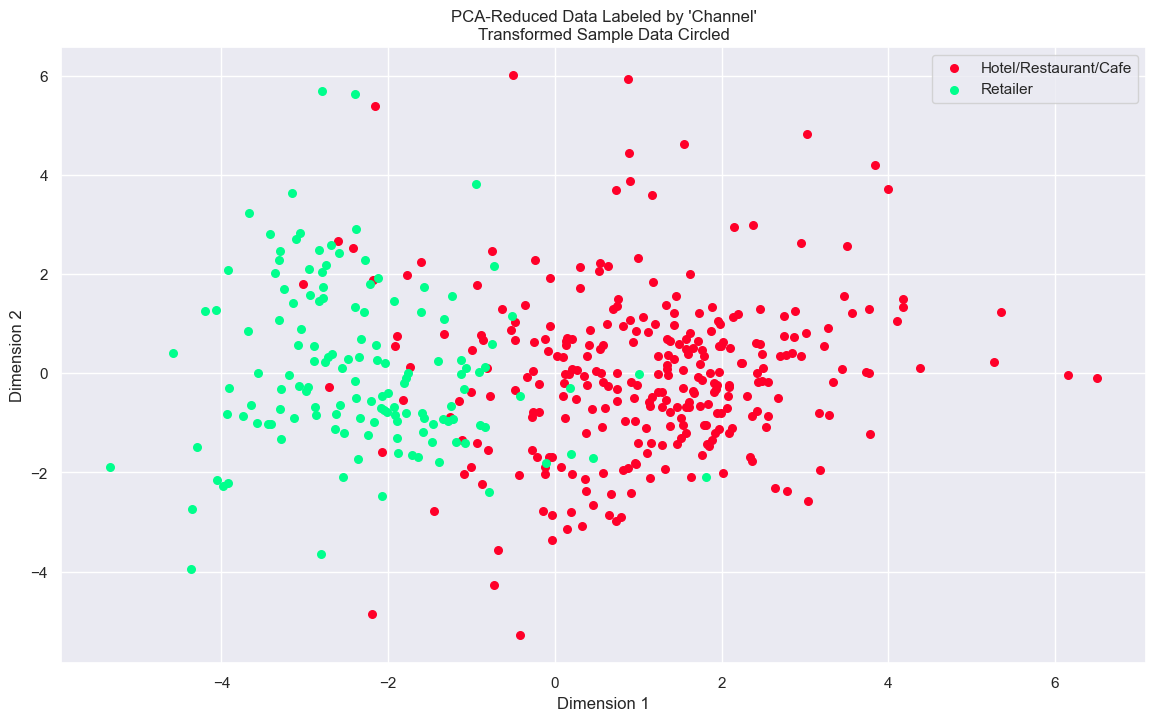

In [151]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, dup_outliers)

**Question:**
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
    The clustering algorithm and number of clusters that I chose seem to be a good fit for the underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers. The two clusters are well-separated, and the majority of the data points are clearly assigned to one cluster or the other.
There are a few customer segments that would be classified as purely "Retailers" or "Hotels/Restaurants/Cafes" by this distribution. The cluster in the lower left corner is almost exclusively retailers, while the cluster in the upper right corner is almost exclusively hotels/restaurants/cafes.
I would consider these classifications as consistent with my previous definition of the customer segments. In my previous definition, I classified customers as "Retailers" if they spent more than 70% of their time in the retail channel, and as "Hotels/Restaurants/Cafes" if they spent more than 70% of their time in the hotel/restaurant/cafe channel. The clustering algorithm seems to be doing a good job of identifying these two types of customers.
However, there are a few customer segments that are not as clearly classified. The cluster in the middle of the plot contains a mix of retailers and hotels/restaurants/cafes. These customers may be businesses that operate in both channels, or they may be customers who are not very loyal to either channel.
Overall, I think the clustering algorithm and number of clusters are a good fit for the underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers. The classifications are consistent with my previous definition of the customer segments, and they can be used to identify customer segments that may be of interest to the business